In [ ]:
from tensorflow import keras
import numpy as np


(Xtrain,ytrain),(Xtest,ytest) = keras.datasets.mnist.load_data()
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
# create the CNN model
cnn_model = keras.models.Sequential() # empty framework
# Convolutinal layer 1
cnn_model.add(keras.layers.Conv2D(10,3,activation='relu',input_shape=(28,28,1)))
# maxpooling -1
cnn_model.add(keras.layers.MaxPool2D((2,2)))

# Convolutinal layer 2
cnn_model.add(keras.layers.Conv2D(50,3,activation='relu'))
# maxpooling -2
cnn_model.add(keras.layers.MaxPool2D((2,2)))

# feed forwards network
cnn_model.add(keras.layers.Flatten()) # input layer
cnn_model.add(keras.layers.Dense(200,activation='relu')) # HL1
cnn_model.add(keras.layers.Dense(200,activation='relu')) # HL2
cnn_model.add(keras.layers.Dense(200,activation='relu')) # HL3
cnn_model.add(keras.layers.Dense(len(np.unique(ytrain)))) # Output layer

# optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
cnn_model.compile(optimizer='sgd',loss = loss,metrics=['accuracy'])
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 10)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 50)        4550      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 50)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1250)              0         
                                                                 
 dense (Dense)               (None, 200)               2

In [7]:
# train the cnn along with the validation data
history = cnn_model.fit(Xtrain,ytrain,epochs=20,validation_data=(Xtest,ytest))

Epoch 1/20
1875/1875 [==============================] - 40s 22ms/step - loss: 3.3919e-04 - accuracy: 0.9999 - val_loss: 0.0785 - val_accuracy: 0.9863
Epoch 2/20
1875/1875 [==============================] - 37s 20ms/step - loss: 8.8354e-05 - accuracy: 1.0000 - val_loss: 0.0792 - val_accuracy: 0.9867
Epoch 3/20
1875/1875 [==============================] - 40s 21ms/step - loss: 5.4894e-05 - accuracy: 1.0000 - val_loss: 0.0804 - val_accuracy: 0.9869
Epoch 4/20
1875/1875 [==============================] - 40s 21ms/step - loss: 4.4281e-05 - accuracy: 1.0000 - val_loss: 0.0813 - val_accuracy: 0.9869
Epoch 5/20
1875/1875 [==============================] - 36s 19ms/step - loss: 3.8163e-05 - accuracy: 1.0000 - val_loss: 0.0821 - val_accuracy: 0.9869
Epoch 6/20
1875/1875 [==============================] - 37s 20ms/step - loss: 3.3537e-05 - accuracy: 1.0000 - val_loss: 0.0828 - val_accuracy: 0.9871
Epoch 7/20
1875/1875 [==============================] - 38s 20ms/step - loss: 3.0039e-05 - accuracy:

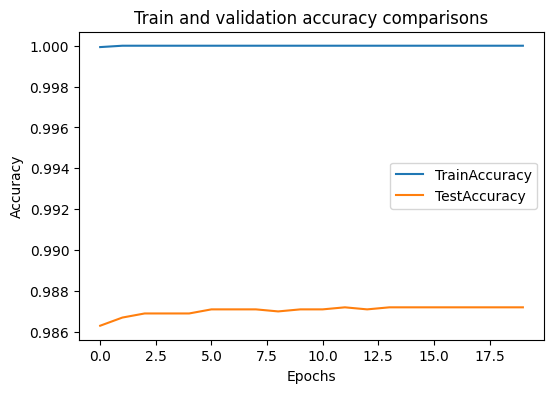

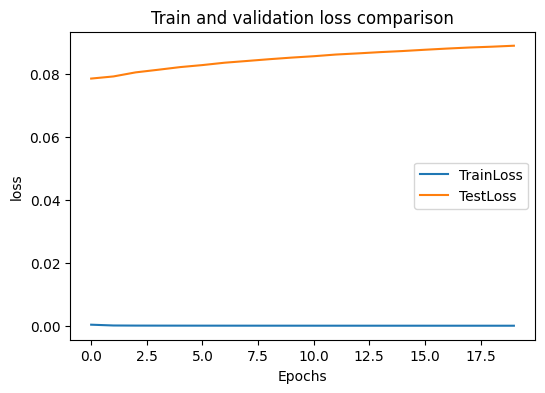

In [8]:
import matplotlib.pyplot as plt

plt.figure(1,(6,4))
plt.plot(history.epoch,history.history['accuracy'],label='TrainAccuracy')
plt.plot(history.epoch,history.history['val_accuracy'],label='TestAccuracy')
plt.title('Train and validation accuracy comparisons')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(2,(6,4))
plt.plot(history.epoch,history.history['loss'],label='TrainLoss')
plt.plot(history.epoch,history.history['val_loss'],label='TestLoss')
plt.title('Train and validation loss comparison')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()